#### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\Advertisingnew.csv')
df.head() ### Checking the dataset 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
### Checking the shape of the dataset 
df.shape

(200, 5)

In [4]:
### As the Unnamed is not any use for the model so, I am droping the column Unnamed: 0
df.drop(columns='Unnamed: 0', inplace=True)
df.head() ### Checking the dataset again

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
### Checking the null values in the dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### There is no null value in the data set. 

In [6]:
### Checking the black entry 
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


### Checking the datatype of the dataset

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

#### As the datatype of all the features are same. So no need to do any change

### Now moving to the EDA part

In [8]:
### Importing some basic libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

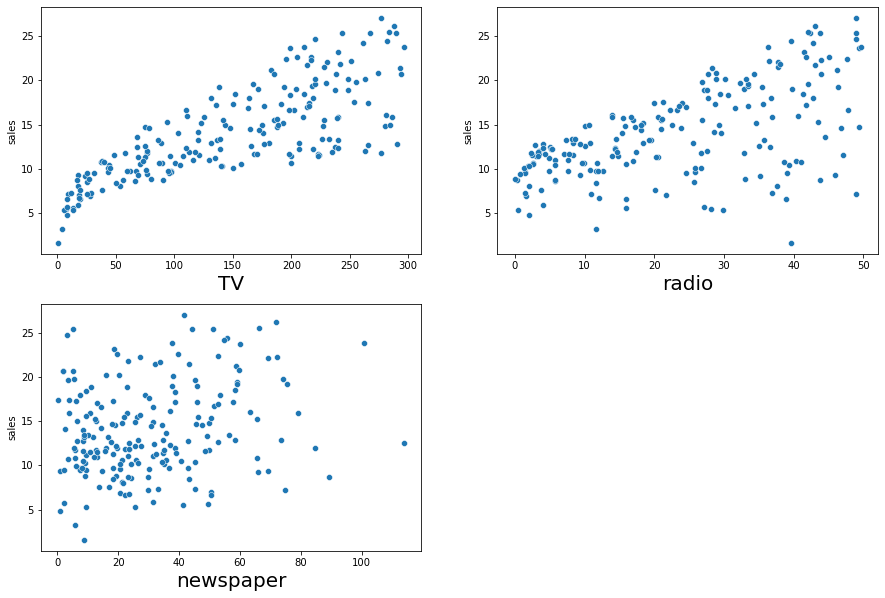

In [9]:
### Chechking the relation between target and feature 

x= df.drop(columns='sales')
y=df["sales"]
plt.figure(figsize=(15,10))
pn=1
for column in x:
    if pn <= 4:
        ax= plt.subplot(2,2, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

### I conclude from the above ploting that feature TV has good trend with Target sales, Radio is also has good trend with sales but radio dose not has that good trend with target as TV and Radio.

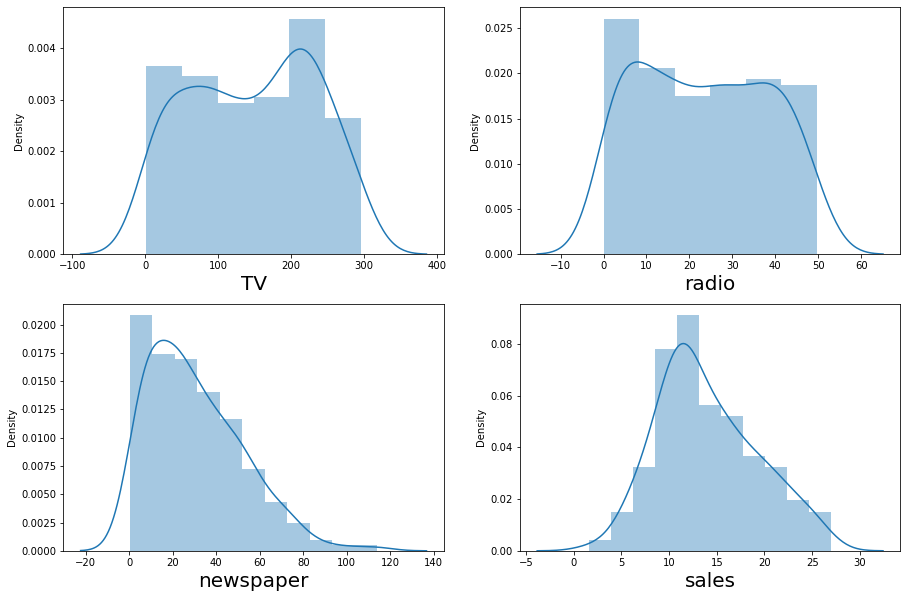

In [10]:
### plotting the distplot for checking the normalization of the dataset

plt.figure(figsize=(15,10))
pn=1
for column in df:
    if pn <= 4:
        ax= plt.subplot(2,2, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

#### I conclude from above plotting
##### 1- TV has not good normalize but has better normalize data
##### 2-Radio has not good normalize but has better normalize data
##### 3- Newspapaer feature is right skewed otherwise has normal distribution 
##### 4- Sales(Target) is good distributuin.

The target as well as feature has better data distribution. So I do not need to perform any normalize technique.

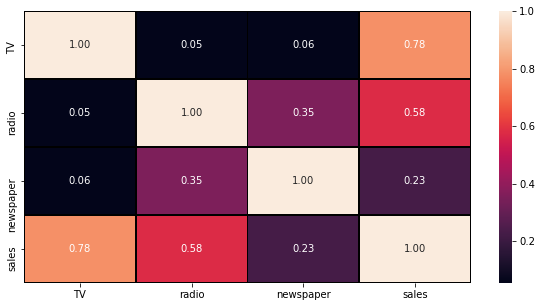

In [11]:
#### ### Now going to check the multicollinearity through heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

### I conclude from the above heatmap plotting that no feature has multicollinearity. 

#### Target(Sales) has maxium relation with TV which is (78%)
#### Target(Sales) has minimum relation with Newspaper which is (23%)

### I do not need to drop any feature as no feature has multicollinearity with each other even all feature has relation with target. 


### Checking the stats of the dataset.

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


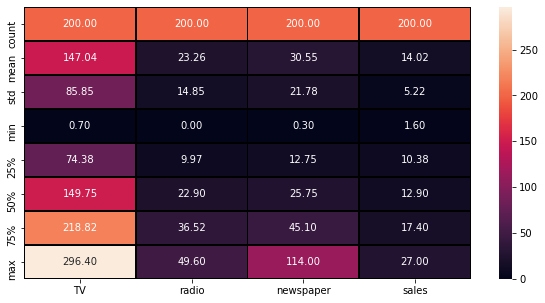

In [13]:
#### Now plotting the heatmap for stats of the data set 
plt.figure(figsize=(10,5))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

### All stats of the dataset seems normal. So I will proceed further and checking the skewness of the data set.

In [14]:
### Checking the skewness of the dataset
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### Keeping +-0.5 as the range for the skewness. Only newspaper feature is skewed. So, I will deal the skewness with power trasformer.

### Before applying the power transformer I will split the feature and target.

In [15]:
x= df.drop(columns='sales')
y=df["sales"]

In [16]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [17]:
x.skew() ## checking that skewness is removed or not.

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

#### We sucessfully removed the skewness of the features.

### Now checking the outliers of the dataset.

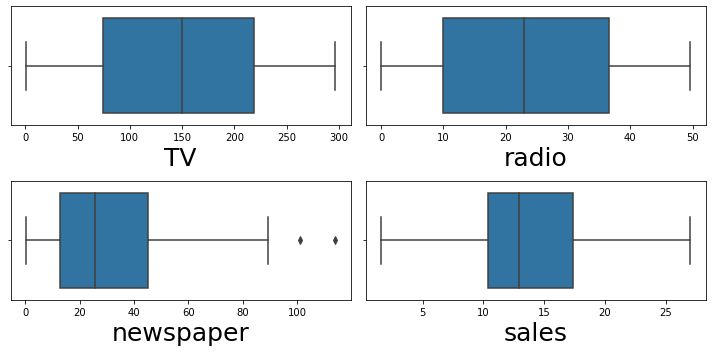

In [18]:
plt.figure(figsize=(10,5), facecolor='white')
pn = 1
for column in df:
    if pn <= 4:
        ax = plt.subplot(2,2, pn)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize =25)
    pn+=1
plt.tight_layout()

### I conclude from the above boxplot that only newspaper feature has 2 outliers, it will be possible that two sales of the newspaer different. Working toward unbias model, I am not going to remove the outlier of the newspapaer. 

### Now spliting the dataset in the features and target. 

In [19]:
x= df.drop(columns='sales')
y=df["sales"]

In [20]:
### Importing the libraries for model building.
from sklearn.preprocessing import StandardScaler ### For scaling the data
from sklearn.model_selection import train_test_split ### for train and testing the model
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [21]:
#### Scaling the feature for model building by using StandardScaler
sc =StandardScaler()
x_scaled = sc.fit_transform(x)

In [22]:
### using train test split for spliting the dataset into the testing and training
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y , test_size=.20, random_state=25)

In [23]:
### Importing the LinearRegression and checking the score and r2 score
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)

print("\n LinearRegression Model Accuracy and Model Scores",  '\n\nR2 score for LinearRegression model', r2_lr*100)


 LinearRegression Model Accuracy and Model Scores 

R2 score for LinearRegression model 87.38569641880865


In [24]:
### Importing the DecisionTreeRegressor and checking the score and r2 score
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
r2_DTR =r2_score(y_test,pred_DTR)

print("\n DecisionTreeRegressor Model Accuracy and Model Scores",  '\n\nR2 score for DecisionTreeRegressor model', r2_DTR*100)


 DecisionTreeRegressor Model Accuracy and Model Scores 

R2 score for DecisionTreeRegressor model 94.06356671034557


In [25]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)

print("\n RandomForestRegressor Model Accuracy and Model Scores",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100)


 RandomForestRegressor Model Accuracy and Model Scores 

R2 score for RandomForestRegressor model 97.24523000443821


In [26]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)

print("\n KNeighborsRegressor Model Accuracy and Model Scores",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100)


 KNeighborsRegressor Model Accuracy and Model Scores 

R2 score for KNeighborsRegressor model 94.30240438488946


In [27]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)

print("\n SupportVectorRegressor Model Accuracy and Model Scores",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100)


 SupportVectorRegressor Model Accuracy and Model Scores 

R2 score for SupportVectorRegressor model 88.88275516694813


### I performed 5 model prediction R2_score, those score are mentioned below - 

#### R2 score for LinearRegression model 87.38569641880865
#### R2 score for DecisionTreeRegressor model 94.9397010598925
#### R2 score for RandomForestRegressor model 97.25821912752743
#### R2 score for KNeighborsRegressor model 94.30240438488946
#### R2 score for SupportVectorRegressor model 88.88275516694813

### From the above, I conclude that I will go forward with RandomForestRegressor model as the r2_score is 97%.


### The RandomForestRegressor model is performing good but still I will try to inscrease the r2_score thorgh hypertuning of paramenter.

In [28]:
#### importing the GridSearchCV for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor()
para = {'n_estimators':range(1,4),
       'criterion':["mse", "mae"],
        'max_depth':range(2,8),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,8)}

In [29]:
gridsearch= GridSearchCV(estimator=RFR, param_grid=para, cv=5, n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10),
                         'n_estimators': range(1, 4)})

In [30]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 3}

In [31]:
RFR = RandomForestRegressor(criterion='mae',max_depth= 8,min_samples_leaf=2,min_samples_split= 5,n_estimators= 9)

In [32]:
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR_n =r2_score(y_test,pred_RFR)

print("\n RandomForestRegressor Model Accuracy and Model Scores",  '\n\nR2 score for RandomForestRegressor model', r2_RFR_n*100)


 RandomForestRegressor Model Accuracy and Model Scores 

R2 score for RandomForestRegressor model 97.26468664374639


### I tried to get more R2 score through Hyperparameter tunning but RandomForestRegressor model given good score without Hyperparameter tunning. So I am moving forward without Hyperparameter tunning RandomForestRegressor model

In [33]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)

print("\n RandomForestRegressor Model Accuracy and Model Scores",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100)


 RandomForestRegressor Model Accuracy and Model Scores 

R2 score for RandomForestRegressor model 97.17083392844648


### Checking the errors metrics like - mean_absolute_error, mean_squared_error

In [34]:
mae = mean_absolute_error(y_test,pred_RFR)
mse = mean_squared_error(y_test,pred_RFR)
rmse = np.sqrt(mse)
print("Error for the RandomForestRegressor", '\n\nMean_absolute_error', mae,"\nMean_squared_error", mse, '\nRoot mean_squared_error', rmse)

Error for the RandomForestRegressor 

Mean_absolute_error 0.6601999999999993 
Mean_squared_error 0.7378599499999957 
Root mean_squared_error 0.8589877472932869


### All errors are normal

### Now performing the cross validataion for the RandomForestRegressor model

In [35]:
### importing the cross validation library
from sklearn.model_selection import cross_val_score
scr = cross_val_score(RFR, x,y, cv=5)
print("Cross Validation for RandomForestRegressor is ", scr.mean())

Cross Validation for RandomForestRegressor is  0.9750179131689309


### Cross validation and model r2 score are same. It is mean that model is performing very good.

## Saving the model pickel format

In [36]:
import joblib
joblib.dump(RFR, 'Advertisement.pkl')

['Advertisement.pkl']